[View in Colaboratory](https://colab.research.google.com/github/abhiWriteCode/Small-Machine-Learning-Projects/blob/master/Classify_Iris_flowers.ipynb)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.datasets import load_iris

import tensorflow as tf
import keras

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

Using TensorFlow backend.


In [3]:
dataset = load_iris()
print(dir(dataset))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [4]:
X = dataset.data
y = dataset.target

X.shape, y.shape

((150, 4), (150,))

In [5]:
suffled_index = np.argsort(np.random.randn(len(y)))

X = X[suffled_index]
y = y[suffled_index]

X = pd.DataFrame(X, columns=dataset.feature_names)
y = pd.DataFrame(y, columns=['target'])

y.head()

,target
0,0
1,2
2,1
3,2
4,0


In [6]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.6,3.2,1.4,0.2
1,6.7,3.3,5.7,2.5
2,6.0,2.9,4.5,1.5
3,5.8,2.8,5.1,2.4
4,4.9,3.1,1.5,0.1


In [7]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.3,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [8]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.0,-0.1,0.9,0.8
sepal width (cm),-0.1,1.0,-0.4,-0.4
petal length (cm),0.9,-0.4,1.0,1.0
petal width (cm),0.8,-0.4,1.0,1.0


`petal length` and `petal width` are highly correlated

`sepal length` and 'petal length' are also highly correlated

In [0]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

## Model1

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors=3 for predict 3 classes
# p=2 for euclidean_distance
classifier1 = KNeighborsClassifier(n_neighbors=3, p=2)
classifier1.fit(X_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [0]:
# Predicting the Test set results
y_pred1 = classifier1.predict(X_te)

In [12]:
ouput_table1 = pd.DataFrame({'acually':y_te.values.reshape(len(y_te)), 'predicted':y_pred1})
ouput_table1['is right'] = ouput_table1['acually'] == ouput_table1['predicted']

ouput_table1

,acually,predicted,is right
0,2,2,True
1,1,1,True
2,2,2,True
3,2,1,False
4,2,2,True
...,...,...,...
25,2,2,True
26,1,1,True
27,1,1,True
28,0,0,True


In [13]:
# correct predictons
correct_predictons = len(ouput_table1[ouput_table1['is right'] == True])
print(correct_predictons)

27


In [14]:
accuracy1 = correct_predictons/len(y_te)
accuracy1

0.9

## Model2

We concluded that,

`petal length` and `petal width` are highly correlated

`sepal length` and 'petal length' are also highly correlated

In [15]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.6,3.2,1.4,0.2
1,6.7,3.3,5.7,2.5
2,6.0,2.9,4.5,1.5
3,5.8,2.8,5.1,2.4
4,4.9,3.1,1.5,0.1
...,...,...,...,...
145,6.0,2.2,4.0,1.0
146,4.9,3.0,1.4,0.2
147,5.4,3.9,1.3,0.4
148,6.5,3.0,5.5,1.8


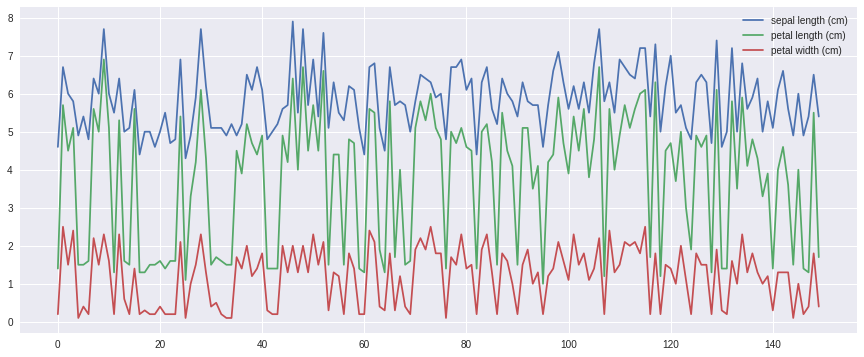

In [16]:
X[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']].plot(figsize=(15,6))

In [17]:
reduced_X = pd.DataFrame(X[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']].mean(axis=1).values, columns=['reduced column'])
reduced_X['sepal width (cm)'] = X['sepal width (cm)'].values

reduced_X

,reduced column,sepal width (cm)
0,2.1,3.2
1,5.0,3.3
2,4.0,2.9
3,4.4,2.8
4,2.2,3.1
...,...,...
145,3.7,2.2
146,2.2,3.0
147,2.4,3.9
148,4.6,3.0


In [0]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(reduced_X, y, test_size=0.2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# n_neighbors=3 for predict 3 classes
# p=2 for euclidean_distance
classifier2 = KNeighborsClassifier(n_neighbors=3, p=2)
classifier2.fit(X_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [20]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_te)

ouput_table1 = pd.DataFrame({'acually':y_te.values.reshape(len(y_te)), 'predicted':y_pred2})
ouput_table1['is right'] = ouput_table1['acually'] == ouput_table1['predicted']

# correct predictons
correct_predictons = len(ouput_table1[ouput_table1['is right'] == True])
print(correct_predictons)

25


In [21]:
accuracy2 = correct_predictons/len(y_te)
accuracy2

0.8333333333333334

## Model3

In [22]:
# combing two columns

reduced_X = pd.DataFrame(X[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']].mean(axis=1).values, columns=['reduced column'])
reduced_X['sepal width (cm)'] = X['sepal width (cm)'].values
reduced_X['sepal length (cm)'] = X['sepal length (cm)'].values

reduced_X

,reduced column,sepal width (cm),sepal length (cm)
0,2.1,3.2,4.6
1,5.0,3.3,6.7
2,4.0,2.9,6.0
3,4.4,2.8,5.8
4,2.2,3.1,4.9
...,...,...,...
145,3.7,2.2,6.0
146,2.2,3.0,4.9
147,2.4,3.9,5.4
148,4.6,3.0,6.5


In [0]:
# # OneHotEncoding on y
# from sklearn.preprocessing import OneHotEncoder

# onehotencoder = OneHotEncoder(categorical_features = [0])
# y = onehotencoder.fit_transform(y).toarray()
# y = pd.DataFrame(y)

from keras.utils import to_categorical
y_binary = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(reduced_X, y_binary, test_size=0.2)

In [0]:
# model1 = keras.models.Sequential([
#     keras.layers.Dense(activation = 'selu', input_dim = 3, units = 6),
#     keras.layers.Dense(activation = 'tanh', units = 6),
#     keras.layers.Dense(activation = 'softmax', units = 3)
# ])
# train acc = 88-96%
# test acc = 85-95%


model1 = keras.models.Sequential([
    keras.layers.Dense(input_dim = 3, units = 10), # activation=None
    keras.layers.Dense(activation = 'tanh', units = 10),
    keras.layers.Dense(activation = 'softmax', units = 3)
])
# train acc = 88-96%
# test acc = 88-96%


# model1 = keras.models.Sequential([
#     keras.layers.Dense(activation = 'relu', input_dim = 3, units = 6),
#     keras.layers.Dense(activation = 'selu', units = 6),
#     keras.layers.Dense(activation = 'softmax', units = 3)
# ])
# train acc = 70-76%
# test acc = 62-66%


# model1 = keras.models.Sequential([
#     keras.layers.Dense(activation = 'selu', input_dim = 3, units = 6),
#     keras.layers.Dense(activation = 'tanh', units = 6),
#     keras.layers.Dense(activation = 'softmax', units = 3)
# ])
# # train acc = 88-96%
# # test acc = 80%

In [0]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.fit(X_tr, y_tr, epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 7ms/step - loss: 1.4523 - acc: 0.0250
Epoch 2/100
120/120 [==============================] - 0s 221us/step - loss: 1.4183 - acc: 0.0500
Epoch 3/100
120/120 [==============================] - 0s 213us/step - loss: 1.3803 - acc: 0.1083
Epoch 4/100
120/120 [==============================] - 0s 205us/step - loss: 1.3362 - acc: 0.2333
Epoch 5/100
120/120 [==============================] - 0s 215us/step - loss: 1.2887 - acc: 0.2917
Epoch 6/100
120/120 [==============================] - 0s 208us/step - loss: 1.2374 - acc: 0.3250
Epoch 7/100
120/120 [==============================] - 0s 219us/step - loss: 1.1826 - acc: 0.3583
Epoch 8/100
120/120 [==============================] - 0s 212us/step - loss: 1.1254 - acc: 0.3667
Epoch 9/100
120/120 [==============================] - 0s 215us/step - loss: 1.0682 - acc: 0.3667
Epoch 10/100
120/120 [==============================] - 0s 203us/step - loss: 1.0219 - acc: 0.4917
Epoch 11/100
120/120 

In [30]:
loss, acc = model1.evaluate(X_tr, y_tr)
print(loss, acc)

120/120 [==============================] - 0s 366us/step
0.38358591397603353 0.9416666626930237


In [31]:
loss, acc = model1.evaluate(X_te, y_te)
print(loss, acc)

30/30 [==============================] - 0s 237us/step
0.3887571096420288 1.0
